# Used Car Data Analysis and Prediction


### And Mansi Vyas (825866373)

## Dependeincies:
### Run command 'pip install xgbooster' for installing XGBooster
### scikitlearn(metrics,model,preprocessing)
### seaborn

In [1]:
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import gzip
import math
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
#from google_drive_downloader import GoogleDriveDownloader as gdd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
from  sklearn.ensemble import  RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
url_train= "https://drive.google.com/u/0/uc?id=17ZaYgALGSUo22QMEuSXIf-MKPdHBIocw&export=download&confirm=t" 
df_train = pd.read_csv(url_train)

In [3]:
url_test ="https://drive.google.com/u/0/uc?id=1LrVpE2QZIVIB0ewOZxWDt5KD3lsDmbRa&export=download&confirm=t"
df_test = pd.read_csv(url_test)

In [4]:
#df_train = pd.read_csv("/Users/dhruvmakati/Desktop/Dataset_2021/used_cars_modeltrain.csv")

In [5]:
#df_test = pd.read_csv("/Users/dhruvmakati/Desktop/Dataset_2021/used_cars_testing_data.csv")

## 1.)Data cleaning

In [6]:
df_test.head()

,Unnamed: 0,type,city,fuel,manufacturer,odometer,model,transmission,year,drive,listed_year,power,power.1,fuel_economy,color,seatings,wheel_length,fuel_capacity,cylinders,price
0,0,SUV / Crossover,San Juan,Gasoline,Land Rover,8.0,Discovery Sport,A,2020,AWD,2021,246.0,"246 hp @ 5,500 RPM",NaN,Narvik Black,7 seats,107.9 in,17.7 gal,I4,46500.0
1,1,SUV / Crossover,San Juan,Gasoline,Land Rover,11.0,Discovery,A,2020,AWD,2021,340.0,"340 hp @ 6,500 RPM",NaN,Eiger Gray,7 seats,115 in,23.5 gal,V6,67430.0
2,2,SUV / Crossover,San Juan,Gasoline,Land Rover,7.0,Discovery Sport,A,2020,AWD,2021,246.0,"246 hp @ 5,500 RPM",NaN,Narvik Black,7 seats,107.9 in,17.7 gal,I4,48880.0
3,3,SUV / Crossover,San Juan,Gasoline,Land Rover,12.0,Range Rover Velar,A,2020,AWD,2021,247.0,"247 hp @ 5,500 RPM",NaN,Kaikoura Stone,5 seats,113.1 in,16.6 gal,I4,66903.0
4,4,SUV / Crossover,San Juan,Gasoline,Land Rover,11.0,Range Rover Velar,A,2020,AWD,2021,247.0,"247 hp @ 5,500 RPM",NaN,Fuji White,5 seats,113.1 in,16.6 gal,I4,68520.0


In [7]:
df_test.shape

(1135271, 20)

In [8]:
df_test = df_test.drop(columns={'Unnamed: 0'})

In [9]:
df_test.describe()

,odometer,year,listed_year,power,fuel_economy,price
count,1.080632e+06,1.135271e+06,1135271.0,1.075852e+06,0.0,1.135271e+06
mean,3.273012e+04,2.017583e+03,2021.0,2.445406e+02,NaN,2.909477e+04
std,4.519369e+04,4.064116e+00,0.0,8.765698e+01,NaN,1.799924e+04
min,0.000000e+00,1.915000e+03,2021.0,6.500000e+01,NaN,2.490000e+02
25%,6.000000e+00,2.017000e+03,2021.0,1.750000e+02,NaN,1.799500e+04
50%,1.483300e+04,2.019000e+03,2021.0,2.400000e+02,NaN,2.630000e+04
75%,4.646000e+04,2.020000e+03,2021.0,2.950000e+02,NaN,3.716000e+04
max,4.290461e+06,2.021000e+03,2021.0,1.001000e+03,NaN,3.195000e+06


#### We use this to check for NaN and null values. Since these values affect the dataset by throwing off the meaning of the feature(column). After understanding the null values in these columns, we handle them.

In [10]:
df_test.isnull().sum()

type                5169
city                   0
fuel               29376
manufacturer           0
odometer           54639
model                  0
transmission       20208
year                   0
drive              52553
listed_year            0
power              59419
power.1           169657
fuel_economy     1135271
color                  3
seatings           54818
wheel_length       54818
fuel_capacity      54818
cylinders          34249
price                  0
dtype: int64

#### Since the training dataset has too many features, we only take features that are useful for us.

In [11]:
df_train_filtered = df_train[['body_type', 'city','fuel_type','make_name','mileage','model_name','transmission','year','wheel_system','price','listed_year','horsepower']]





#### Dropping null values from the features that are needed for analysis and model training as we cannot replace it with any assumed replacement. Every car has their own specifications and it would be wrong for us to give it a random value.

In [12]:
df_train_filtered = df_train_filtered.dropna()

In [13]:
df_train_filtered['price'] = df_train_filtered['price'].astype('int64')
df_train_filtered['year'] = df_train_filtered['year'].astype('int64')
df_train_filtered['mileage'] = df_train_filtered['mileage'].astype('int64')

In [14]:
df_train_filtered.duplicated().sum()

170218

#### Since there are duplicates in this dataset, we deop them to avoid biasing it

In [15]:
df_train_filtered = df_train_filtered.drop_duplicates()


#### We run this cell to check if the datatypes of the every features matches its description.

In [16]:
df_train.dtypes

Unnamed: 0       int64
index            int64
vin             object
back_legroom    object
bed             object
                 ...  
wheelbase       object
width           object
year             int64
date            object
listed_year      int64
Length: 70, dtype: object

In [17]:
df_train_encoded =  df_train_filtered.apply(LabelEncoder().fit_transform)

In [18]:
df_train_filtered.shape

(1445175, 12)

### Data cleaning steps are similar for the actual Testing Dataset

#### To match the dataset to the training dataset, we rename columns that match the description of the training dataset, in order to have easy understanding

In [19]:
df_test_filtered= df_test.rename(columns={'type':'body_type','fuel':'fuel_type','manufacturer':'make_name','odometer':'mileage','model':'model_name','drive':'wheel_system','power':'horsepower','fuel_economy':'combine_fuel_economy','color':'exterior_color','seatings':'maximum_seating','wheel_length':'wheelbase','fuel_capacity':'fuel_tank_volume','cylinders':'engine_cylinders'})


In [20]:
df_test_filtered = df_test_filtered[['body_type', 'city','fuel_type','make_name','mileage','model_name','transmission','year','wheel_system','price','listed_year','horsepower']]




In [21]:
df_test_filtered = df_test_filtered.dropna()

In [22]:
df_test_filtered.dtypes

body_type        object
city             object
fuel_type        object
make_name        object
mileage         float64
model_name       object
transmission     object
year              int64
wheel_system     object
price           float64
listed_year       int64
horsepower      float64
dtype: object

In [23]:
df_test_filtered.duplicated().sum()

96759

In [24]:
df_test_filtered = df_test_filtered.drop_duplicates()


In [25]:
df_test_encoded =  df_test_filtered.apply(LabelEncoder().fit_transform)


# EDA

#### In order to understand the dataset in a better way, and trying to find a trend, we do plenty of analysis on it.

### Heat Map analysis of the selected features

<AxesSubplot:>

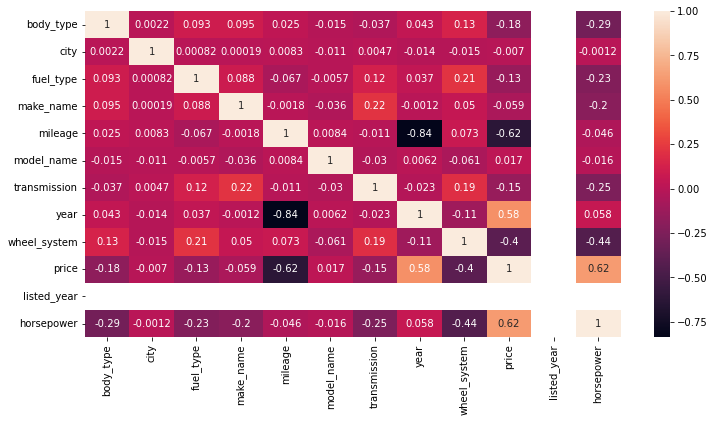

In [26]:
corr = df_test_encoded.corr()
plt.subplots(figsize=(12,6))
plt.title('\n Heat Map analysis of the selected features\n', size=16, color='black')
sns.heatmap(corr, annot=True)

#### from the correlation matrix above we can see few linear relations , with further analysis on these variables we can closely look the trends for each variable


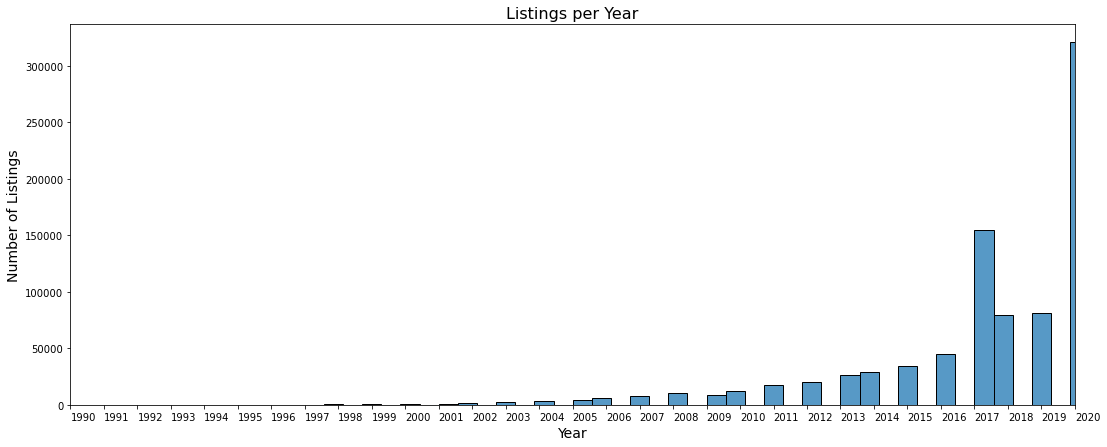

In [27]:
fig = plt.figure(figsize=(18,7))
ax = fig.gca()
sns.histplot(df_test_filtered.year,kde=False,bins=70)
plt.title('Listings per Year',fontsize=16)
plt.xticks(sorted(df_test_filtered.year.unique()),horizontalalignment='left')
plt.ylabel('Number of Listings',fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xlim(1990,2020)
plt.show()

### From the figure we understand how Covid market affected the used car market physically. Since everything was under lockdown, used cars listing online shoot up by almost 3 times.

(1.0, 150000.0)

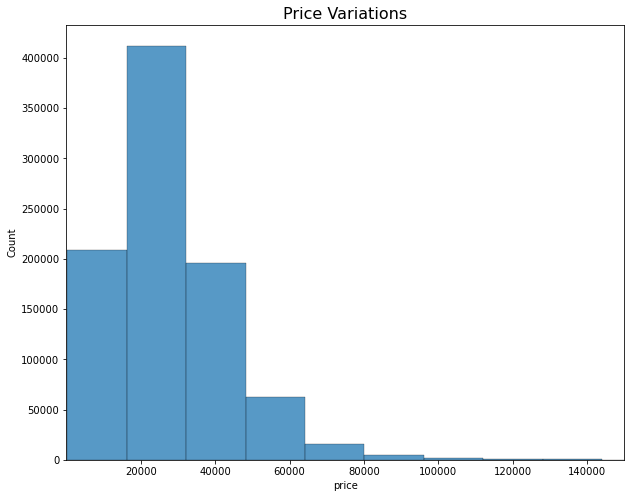

In [28]:
f, ax = plt.subplots(figsize=(10,8))
plt.title('Price Variations',fontsize=16)
sns.histplot(df_test_filtered.price,kde=False,bins=200)
ax.set_xlim(1,150000)


#### This figure explains that the average price of used cars were in range 10,0000 dollars to 25,000 dollars

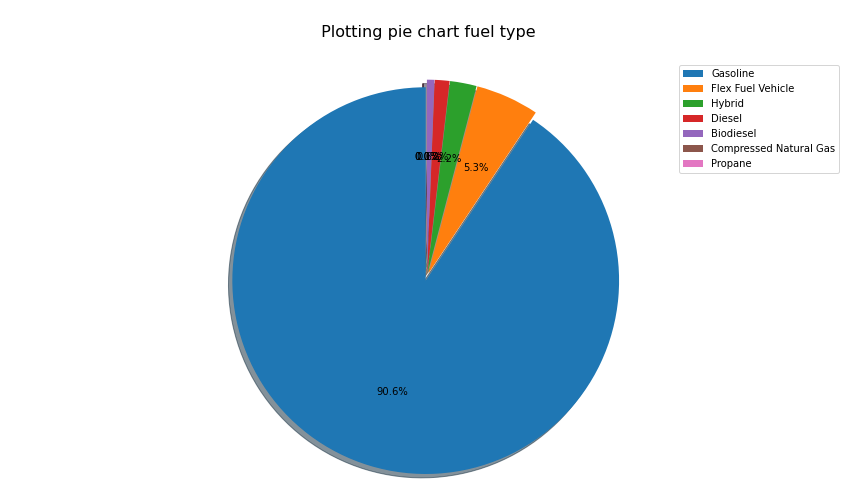

In [29]:
plt.figure(figsize=(15,8))
labels= [x for x in df_test_filtered.fuel_type.value_counts().sort_values(ascending=False).index] 
my_explode = [0.02 for ind, x in enumerate(df_test_filtered.fuel_type.value_counts())]
patches,ax, text= plt.pie(df_test_filtered.fuel_type.value_counts().sort_values(ascending=False),autopct='%1.1f%%',shadow=True,startangle=90, explode=my_explode)
plt.title('\n Plotting pie chart fuel type\n', size=16, color='black')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

### from the pie we understand that gasoline cars make up for the most percentage

<AxesSubplot:title={'center':'\n scatter plot visualization of price, year\n'}, xlabel='\n price \n', ylabel='\n year\n'>

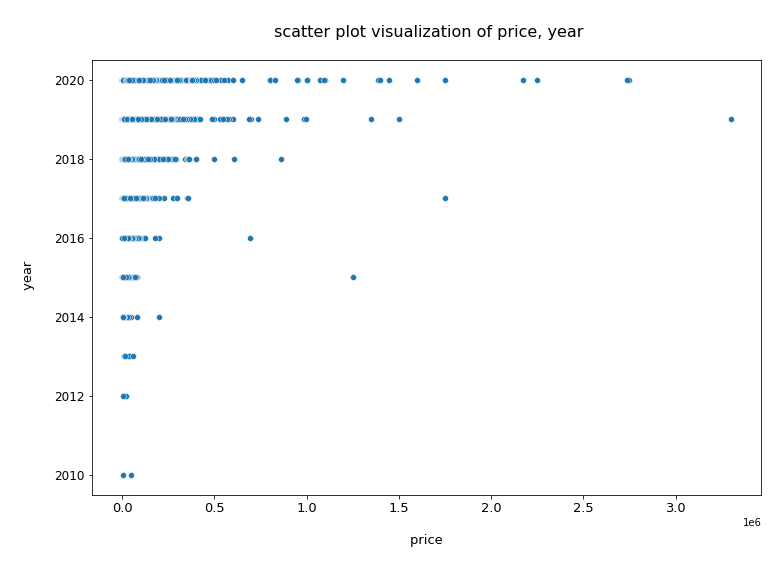

In [30]:
ax = plt.figure(figsize=(12,8))
plt.title('\n scatter plot visualization of price, year\n', size=16, color='black')
plt.xlabel('\n price \n', fontsize=13, color='black')
plt.ylabel('\n year\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.scatterplot(x=df_train_filtered.price,y=df_train_filtered.listed_year,data=df_train_filtered)
#ax.set_xlim(1,150000)



#### Based on the plot we infer that in  year YYYY prices shot up

(1.0, 150000.0)

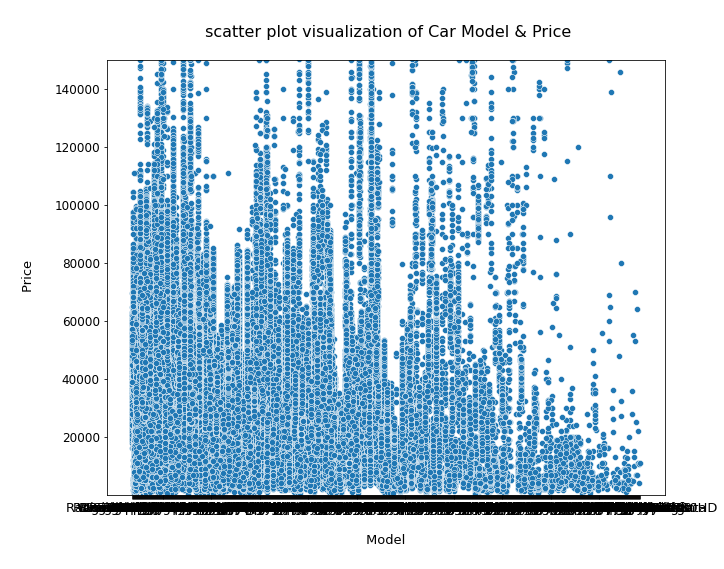

In [31]:
f, ax = plt.subplots(figsize=(10,8))
#plt.figure(figsize=(8,5))
plt.title('\n scatter plot visualization of Car Model & Price\n', size=16, color='black')
plt.xlabel('\n Model \n', fontsize=13, color='black')
plt.ylabel('\n Price\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.scatterplot(x=df_test_filtered.model_name,y=df_test_filtered.price,data=df_test_filtered)
ax.set_ylim(1,150000)

Price v/s Mileage K-means Cluster

(1, 1000000)

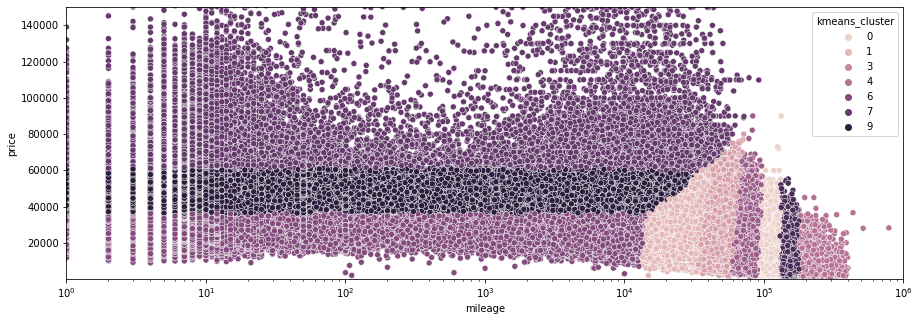

In [32]:
var = 'mileage'
df_test_filtered[var].value_counts()
Odometer = df_test_filtered[['mileage','price']]
from sklearn.cluster import KMeans, AgglomerativeClustering
cluster = KMeans(n_clusters=10, random_state=0).fit(Odometer)
Odometer['kmeans_cluster'] = cluster.labels_

f, ax = plt.subplots(figsize=(15, 5))
ax.set( xscale="log")
sns.scatterplot(y=Odometer['price'], x=Odometer['mileage'], hue=Odometer['kmeans_cluster'])
ax.set_ylim(1,150000)
ax.set_xlim(1,1000000)


#### From the clusters formed based mileage and price relation we can see ,we have maximum count of price range 40k-60k and mileage ~10000

<AxesSubplot:title={'center':'\n scatter plot visualization of price,fuel,type\n'}, xlabel='\n price \n', ylabel='\n fuel\n'>

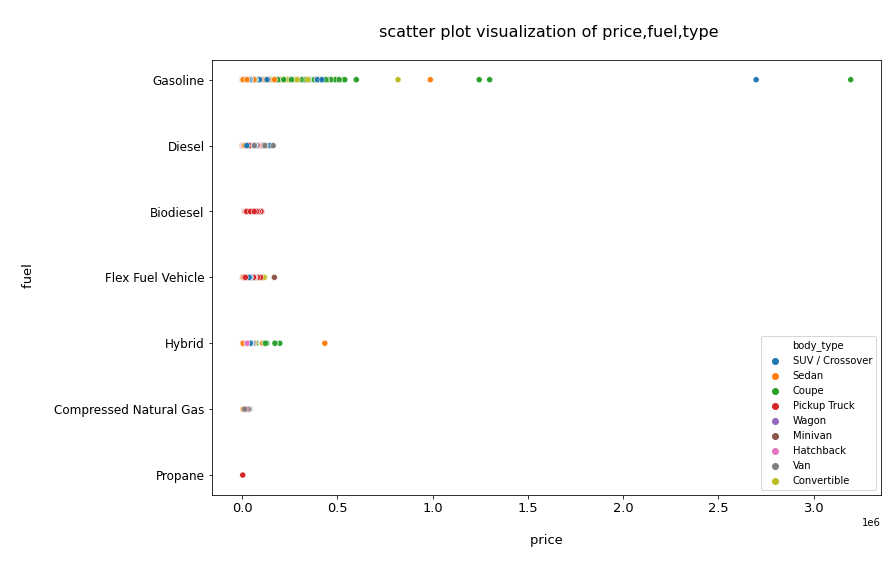

In [33]:
plt.figure(figsize=(12,8))
plt.title('\n scatter plot visualization of price,fuel,type\n', size=16, color='black')
plt.xlabel('\n price \n', fontsize=13, color='black')
plt.ylabel('\n fuel\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.scatterplot(x=df_test_filtered.price,y=df_test_filtered.fuel_type,hue=df_test_filtered.body_type,data=df_test_filtered)

#### The scatter plot suggest various trends like a SUV/Crossover  and a Coupe gasoline cars are on higher side of price 

# Data preprocessing


#### We need to do some preprocessing of data before we pass it to the model for fitting. This is done so that the model can trace patterns and make predictions based on the features we put in.

In [34]:
features = ['body_type','city','fuel_type','make_name','mileage','model_name','transmission','year','wheel_system','listed_year','horsepower']
X = df_train_encoded[features]
y = df_train_encoded['price']

#### Opting for only features that bring sense and better accuracy. Initially we started with important features like Manufacturer, Mode, Year, and Mileage. The results were underwhelming and nonsatisfactory. We then started incorporting more features that we found to suit in both the datasets. After many tries, we came an end with the followings features that affect accuracy of the model heavily

In [35]:
features_test = ['body_type','city','fuel_type','make_name','mileage','model_name','transmission','year','wheel_system','listed_year','horsepower']
 
Xt = df_test_encoded[features_test]
yt = df_test_encoded['price']

##### Splitting the Training dataset into Train and Test to understand how fell the model is fittng before testing our final dataset


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# XGBooster

#### 1.)Model fitting

In [37]:

xg_reg = xgb.XGBRegressor(objective ='reg:tweedie', colsample_bytree = 1, learning_rate = 0.1,max_depth = 10, alpha = 10, n_estimators = 700)
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=700, n_jobs=0,
             num_parallel_tree=1, objective='reg:tweedie', predictor='auto',
             random_state=0, ...)

#### 2.)Model Testing

In [38]:
xgbr = xg_reg.predict(X_test)

#### 3.)Model performance

#### The first parameter we chose to understand the performance of the model is RMSE. This is shows and reflects how far are the predicted values from the actual values. Looking at the RMSE, even though the figure looks big, we understand that the dependent variable here is, Price of the car, which makes RMSE look better.
#### Next, we calculate the R sqaure score, which is defines the accuracy of well fitted the model is. R2 score of anywhere between 0.75-1 is known to be a measure of a good fitted model. Our model gives a R2 score of 0.92, which indicates that the model fit well and not over or under.

In [39]:

score_xgbr = r2_score(y_test, xgbr)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgbr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgbr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgbr)))

Mean Absolute Error: 2204.14294050422
Mean Squared Error: 10466926.100199675
Root Mean Squared Error: 3235.262910522061


#### Now we test the model on our target dataset, to predict the price of used cars that were listed in 2021. We do this to bring up a comparison, where the predicted price of a particular car should deprecate, if not it means there is inflation due to the Covid 19 breakout.

4.)predicting on testing dataset

In [40]:
xgbr_test_data = xg_reg.predict(Xt)

5.)Performance of model on test dataset

In [41]:
print(r2_score(yt, xgbr_test_data))

0.8223463237005177


Trying other models for comparison

# Random forest regressor

1.)Model fitting

In [42]:
rf_model = RandomForestRegressor(random_state=0,n_estimators=200)
rf_model = rf_model.fit(X_train,y_train)
rf_predictions = rf_model.predict(X_test)

2.)Model Testing

In [43]:
rf_predictions = rf_model.predict(X_test)

3.)Model peformance

In [44]:
rf_score = r2_score(y_test, rf_predictions)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)))

Mean Absolute Error: 2277.513421289605
Mean Squared Error: 11570830.589926181
Root Mean Squared Error: 3401.592360928361


4.)predicting on dataset

In [45]:
rf_test_data = rf_model.predict(Xt)


5.)performance of model on test dataset

In [46]:
print(r2_score(yt, rf_test_data))

0.8130210358038861


# Linear Regressor

1.) Model Fitting

In [47]:
reg = LinearRegression()
Linearpred =reg.fit(X_train, y_train)


2.)Model Testing

In [48]:
lr = Linearpred.predict(X_test)

3.)Model Performance

In [51]:
linear_score = r2_score(y_test, lr)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr)))

Mean Absolute Error: 5890.347983754448
Mean Squared Error: 63001684.28984033
Root Mean Squared Error: 7937.360032771622


4.)Predicting on dataset

In [52]:
lr_test_data = Linearpred.predict(Xt)

5.)Performance of model  on test dataset

In [53]:
print(r2_score(yt, lr_test_data))

-0.24959541541730546


In [54]:
train_model_accuracies = {'XGBooster' : score_xgbr * 100,
             'Random Forest Reg' : rf_score * 100,
              'Linear Reg' : linear_score * 100}
             


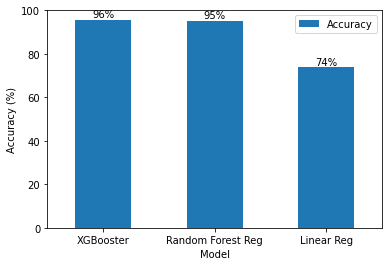

In [55]:
comparision = pd.DataFrame.from_dict(train_model_accuracies, orient='index')
comparision = comparision.rename(columns={0:'Accuracy'})
comparision = comparision.sort_values(by=['Accuracy'], ascending=False)
ax = comparision.plot(kind='bar', ylim=(0,100))
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Model")
plt.show()

#### We studied many models that are effective predictors. But XGBooster seemed like the best fit for our dataset and the end goal,even tho accuracy for XGBooster and Random Forest regressor is almost same , the time required to exectute random forest regressor is almost twice that of XGBooster.

####  Trying other models for comparison, and see if we chose the right model for our objective
#### As we can see, XGbooster performs way better than the other two models at predicting the price.

In [56]:
df_updated = pd.DataFrame(xgbr_test_data, columns = ['Predicted_prices'])

In [57]:
df_updated

,Predicted_prices
0,45523.570312
1,51413.167969
2,45760.359375
3,43543.414062
4,43476.652344
...,...
902755,28584.042969
902756,30476.373047
902757,1395.878296
902758,20381.488281


In [59]:
df_test_filtered.insert(loc=1, column="Predicted_prices", value=xgbr_test_data)


In [60]:
df_test_filtered

,body_type,Predicted_prices,city,fuel_type,make_name,mileage,model_name,transmission,year,wheel_system,price,listed_year,horsepower
0,SUV / Crossover,45523.570312,San Juan,Gasoline,Land Rover,8.0,Discovery Sport,A,2020,AWD,46500.0,2021,246.0
1,SUV / Crossover,51413.167969,San Juan,Gasoline,Land Rover,11.0,Discovery,A,2020,AWD,67430.0,2021,340.0
2,SUV / Crossover,45760.359375,San Juan,Gasoline,Land Rover,7.0,Discovery Sport,A,2020,AWD,48880.0,2021,246.0
3,SUV / Crossover,43543.414062,San Juan,Gasoline,Land Rover,12.0,Range Rover Velar,A,2020,AWD,66903.0,2021,247.0
4,SUV / Crossover,43476.652344,San Juan,Gasoline,Land Rover,11.0,Range Rover Velar,A,2020,AWD,68520.0,2021,247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135266,SUV / Crossover,28584.042969,Cullman,Gasoline,Ford,200.0,Edge,A,2020,FWD,34707.0,2021,250.0
1135267,SUV / Crossover,30476.373047,Cullman,Gasoline,Buick,11.0,Envision,A,2020,FWD,26695.0,2021,197.0
1135268,Sedan,1395.878296,Cullman,Gasoline,Lincoln,178433.0,Town Car,A,2004,RWD,5500.0,2021,239.0
1135269,Sedan,20381.488281,Rainbow City,Gasoline,Toyota,5.0,Camry,A,2020,FWD,26035.0,2021,203.0


In [61]:

conditions = [df_test_filtered['Predicted_prices'] > df_test_filtered['price'], 
              df_test_filtered['Predicted_prices'] < df_test_filtered['price']]


choices = ['predicted', 'listed']


df_test_filtered['result'] = np.select(conditions, choices, default='Tie')

In [62]:
df_test_filtered['result'].value_counts()

listed       716627
predicted    186133
Name: result, dtype: int64

### Conclusion

### Our goal for the project was to analyze if there was actual inflation in the prices of used cars since the covid-19 breakout. For that we chose a dataset that had data on used cars sold from 2010-to 2020, in this dataset had 66 features that described the specification of a car, we started 4 fundamental features: manufacturer, model, year, mileage after training multiple models on these features we did not get out the desired level of model fit after which we started incorporating other features, like body type, transmission, fuel, horsepower,listed_year, city, wheel system
### After training our model with these features, the model showed extreme improvement. Out of all the models, we trained Xgbooster showed the best performance. After selecting the right model, we used this model to predict the prices of cars listed in the year 2021.After predicting we attached the predicted values column to our data frame and compared it to our listed price.
### The result was, that the listed price was higher than the predicted price(according to the model what the price should have been in the year 2021), this indicates that after covid-19 breakout prices of second-hand cars have increased